Para esta práctica tienes que utilizar los csv (sessions y ventas), que representan los resultados de un experimento en el que se pureban variantes de una landing page (variantes A y B).

Acada variante de esta landing page llegan visitantes que realizan sesiones (identificadas con una session_id) y dejan sus datos de contacto si les interesa (lead).
Algunos lead finalmente compran (campo compra).

El objetivo de la práctia es responder a estas preguntas. 
1. ¿Qué variante tiene mayor conversión de sesión a lead? Acompáñalo de una visualización.
2. ¿Qué variante tiene mayor conversión de lead a venta? Acompáñalo de una visualización.
3. A raíz de los datos del experimento, explica en un párrafo una obseración adicional. Puedes acompñar la explicación de un cálculo, tabla o visualización.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_sessions=pd.read_csv("data/sessions.csv")
df_ventas=pd.read_csv("data/ventas.csv")
df_sessions.shape

(2607, 5)

In [5]:
df_ventas.shape

(2607, 2)

In [6]:
df=pd.merge(df_sessions, df_ventas, on=["session_id"])
df.shape

(2607, 6)

In [51]:
df.head(3)

,session_id,lead,sistema_operativo,variante,oferta_movil,compra
0,95f469a0-dd58-48b8-a79f-74c7bb96fba0,False,Mac,A,iPhone 13 Pro,False
1,655acce0-469b-4e35-a580-22b92e9bd8a3,False,Android,A,iPhone 13 Pro,False
2,708fd8e2-78c8-4f83-bb12-764ec3b764f3,False,Android,A,iPhone 13 Pro,False


In [7]:
df.notnull().count() #no hay valores nulos ni en 

session_id           0
lead                 0
sistema_operativo    0
variante             0
oferta_movil         0
compra               0
dtype: int64

### Variante con mayor conversión de sesion a Lead

In [8]:
#df[df.variante == "A"]["lead"].value_counts(normalize=True)
#df[df.variante == "B"]["lead"].value_counts(normalize=True)

In [9]:
True_A=df[df["variante"]=="A"][df["lead"]==True].size
False_A=df[df["variante"]=="A"][df["lead"]==False].size
Total_A=df[df["variante"]=="A"].size
print("True en A:", round((True_A/Total_A)*100,2),"%")
print("False en A:", round((False_A/Total_A)*100,2),"%")

True en A: 21.37 %
False en A: 78.63 %


In [10]:
True_B=df[df["variante"]=="B"][df["lead"]==True].size
False_B=df[df["variante"]=="B"][df["lead"]==False].size
Total_B=df[df_sessions["variante"]=="B"].size
print("True en B:", round((True_B/Total_B)*100,2),"%")
print("False en B:", round((False_B/Total_B)*100,2),"%")

True en B: 20.71 %
False en B: 79.29 %


**La que tiene mayor conversión es la variante A con un 21.37% frente a un 20.71% de la variante B**

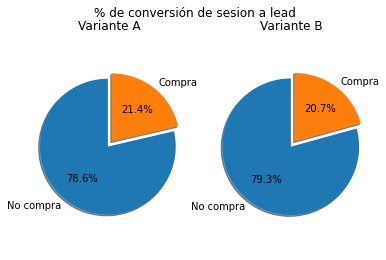

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('% de conversión de sesion a lead')
labels = 'No compra', 'Compra'
explode = (0, 0.1) 

ax1.pie(df[df["variante"]=="A"]["lead"].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title("Variante A")


ax2.pie(df[df["variante"]=="B"]["lead"].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal') 
ax2.set_title("Variante B")

plt.show()

### Variante con mayor conversión de lead a Venta

In [12]:
#df[(df.variante == "A") & (df.lead==True)]["compra"].value_counts()
#df[(df.variante == "B") & (df.lead==True)]["compra"].value_counts()

In [13]:
Totallead_A=df[(df.variante == "A") & (df.lead==True)]["compra"].size
Compra_A=df[(df.variante == "A") & (df.lead==True)]["compra"].value_counts()[1]
print("Conversión a compra con éxito en variante A", round((Compra_A/Totallead_A)*100,2),"%")

Conversión a compra con éxito en variante A 7.82 %


In [14]:
Totallead_B=df[(df.variante == "B") & (df.lead==True)]["compra"].size
Compra_B=df[(df.variante == "B") & (df.lead==True)]["compra"].value_counts()[1]
print("Conversión a compra con éxito en variante A", round((Compra_B/Totallead_B)*100,2),"%")

Conversión a compra con éxito en variante A 8.63 %


**La que tiene mayor conversión es la variante B con un 8.63% frente a un 7.82% de la variante A**

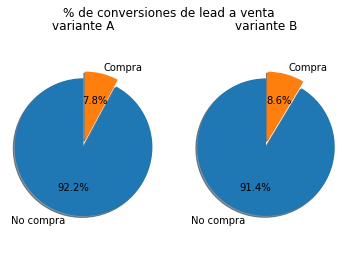

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('% de conversiones de lead a venta')
labels = 'No compra', 'Compra'
explode = (0, 0.1) 

ax1.pie(df[(df.variante == "A") & (df.lead==True)]["compra"].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title("variante A")


ax2.pie(df[(df.variante == "B") & (df.lead==True)]["compra"].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal') 
ax2.set_title("variante B")

plt.show()

In [16]:
df[(df.variante=="A")]["compra"].value_counts()

False    1353
True       23
Name: compra, dtype: int64

In [17]:
df[(df.variante=="B")]["compra"].value_counts()

False    1209
True       22
Name: compra, dtype: int64

In [18]:
df["compra"].value_counts(normalize=True)

False    0.982739
True     0.017261
Name: compra, dtype: float64

In [19]:
df[(df.lead==True)]["oferta_movil"].value_counts(normalize=True)

iPhone 13 Pro      0.449909
Xiaomi Redmi 9A    0.309654
Galaxy A12         0.240437
Name: oferta_movil, dtype: float64

In [20]:
#df[(df.variante == "A") & (df.lead==True)]["oferta_movil"].value_counts(normalize=True)

In [21]:
#df[(df.variante == "B") & (df.lead==True)]["oferta_movil"].value_counts(normalize=True)

In [22]:
df[(df.compra==True)]["oferta_movil"].value_counts()

iPhone 13 Pro      18
Xiaomi Redmi 9A    15
Galaxy A12         12
Name: oferta_movil, dtype: int64

In [23]:
df.corr()

,lead,compra
lead,1.000000,0.256598
compra,0.256598,1.000000


In [49]:
round(df.sistema_operativo.value_counts(normalize=True)*100,2) #conexiones según terminal

Android    85.00
iOS        13.16
Windows     1.57
Mac         0.19
Linux       0.08
Name: sistema_operativo, dtype: float64

In [28]:
df[(df.compra==True)]["sistema_operativo"].value_counts() #conexiones según terminal que terminan en venta

Android    37
iOS         8
Name: sistema_operativo, dtype: int64

In [39]:
df_compra=df[(df.compra == True)]
df_compra[(df_compra.sistema_operativo=="Android")]["oferta_movil"].value_counts()

Xiaomi Redmi 9A    13
iPhone 13 Pro      12
Galaxy A12         12
Name: oferta_movil, dtype: int64

In [40]:
df_compra[(df_compra.sistema_operativo=="iOS")]["oferta_movil"].value_counts()

iPhone 13 Pro      6
Xiaomi Redmi 9A    2
Name: oferta_movil, dtype: int64

Ambas landing page estan teniendo un rendimiento similar. Si analizamos globalmente 98% de las session id no fructifican en una venta, en cuanto a que variante funciona mejor para solictar información, parece que funciona mejor la variante A, pero en cuanto a número de ventas no hay diferencia.

El % de sesiones que pasan a lead tienen como punto en común la oferta de movil "iPhone 13 Pro" en ambas variantes de landing page, observandose el mismo comportamiento para las ventas finales aunque con menos diferencia entre ofertas.

La mayoría de las visitas son por móvil, siendo los que vienen de terminales Android los más númerosos. Una vez hablamos de ventas sólo se han vendido terminales a partir de consultas que vienen de moviles, siendo las que se dan en mayor proporción las que vienen de sistemas Android.

Recomendaría evaluar las cifras de venta y %lead con lo que se considere óptimo y revisitar las landing page para evaluar si existen diferencias reales entre ambas. Ya que puede que el problema no resida en el diseño y rendimiento de las mismas, si no más bien en lo que se refiere a la oferta.